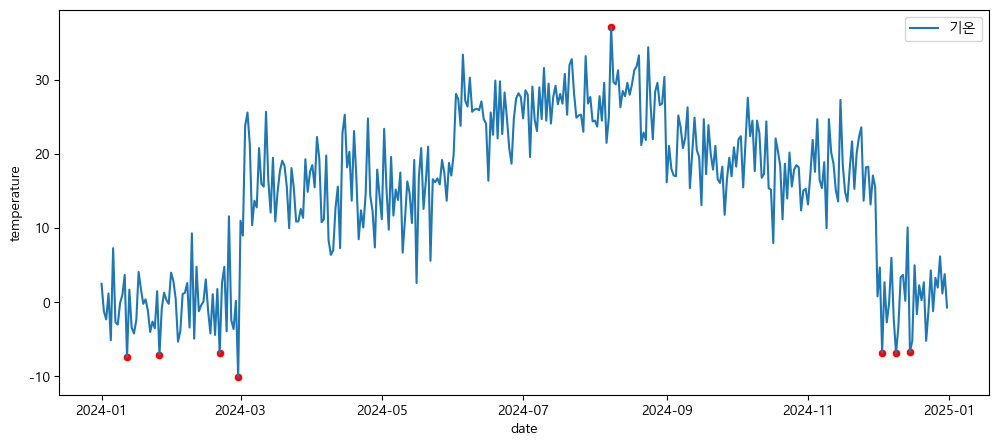

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

#date 컬럼을 연산(+,-) 가능한 객체로 변환하기
df = pd.read_csv("weather_data_2024.csv", parse_dates=["date"])

#3,4,5 봄  6,7,8    9,10,11,  12,1,2
df["month"] = df["date"].dt.month

# 봄 , 여름, 가을, 겨울을 구분하는 함수 만들기
def get_season(month):
    if month in [3,4,5]:
        return "봄"
    elif month in [6,7,8]:
        return "여름"
    elif month in [9,10,11]:
        return "가을"
    else:
        return "겨울"

df["season"] = df["month"].apply(get_season)

#월별 기준으로 기온, 습도, 강우량, 풍속으로 묶어 주기(월별 평균)
monthly_mean = df.groupby("month")[["temperature", "humidity", "rainfall", "wind_speed"]].mean()

#시각화
## 월별 평균 기온 시각화
# plt.figure(figsize=(10,5))
# sns.lineplot(
#     data=monthly_mean,
#     x = 'month',
#     y = 'temperature',
#     marker = "o"
# )
# plt.title("2024년 월별 평균 기온 변화")
# plt.xlabel("단위 : 월")
# plt.ylabel("단위 : 기온(C)")
# plt.show()

##월별 평균 강수량 시각화

## 계절별 평균 분석 시각화

## 계절별 평균 기온 시각화

## 계절별 평균 습도 시각화

## 상관관계 분석(히트맵)

## 이상 기온 여부 그래프
### 이상치 데이터를 임의로 생성 -> 표준편차(98%) 벗어난
#### 평균, 표준편차
mean_temp = df["temperature"].mean() ## 기온의 평균
std_temp = df["temperature"].std() ## 기온의 평균

upper = mean_temp + 2 * std_temp #상위 이상치
lower = mean_temp - 2 * std_temp #하위 이상치

df["is_outlier"] = (df["temperature"] > upper) | (df["temperature"] < lower)

plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='temperature', data=df, label='기온')
sns.scatterplot(
    x='date', 
    y='temperature', 
    data=df[df["is_outlier"]],
    color='red'
)
plt.show()




        